## Machine Learning Demonstration- NLP


## Requirements
You can download the NLP library from https://code.kx.com/q/ml/ and is required to be located in QHOME.

The following python packages are required to run this notebook:
  1. beautifulsoup4: ``` pip install beatifulsoup4 ```
  2. spacy: ```pip install -U spacy```
  3. numpy: ```pip install numpy```
  
You also need to run this line in the terminal to download the English model :  ``` python -m spacy download en ```

### Natural language processing
Natural language processing (NLP) can be used to answer a variety of questions about unstructured text data, as well as facilitating open-ended exploration. It can be applied to datasets such as emails, online articles and comments, tweets, or novels. Although the source is text, transformations are applied to convert this data to vectors, dictionaries and symbols which can be handled very effectively by q. Many operations such as searching, clustering, and keyword extraction can all be done using very simple data structures, such as feature vectors.

### Preparing text

In natural language processing, a collection of documents is called a corpus, with the plural being corpora.
Text often comes with associated metadata. For e-mails, this could be the sender and receivers, the date sent, and any labels applied. For online comments, this could include a user name, rating, and URL. As these are often relevant to the analysis, it is convenient to store the plain text and metadata together in a table, with a row for every document, where a document could be as simple as a tweet or text message.

Once the plain text has been retrieved, operations common to many higher-level NLP operations can be done. These operations include tokenization, sentence detection, part-of-speech recognition, parsing, named entity recognition, and sentiment analysis.

* Tokenization - This operation splits the the input into words, or similar tokens (e.g. John’s > John is one token and ‘s is another token.)
* Sentence detection - Gives the indices at which the sentences start and end
* Part of speech tagger - Parses the sentences into tokens and gives each token a given label (e.g. lemma, pos, tag, etc.) Penn Treebank and Universal tags are both supported: http://universaldependencies.org/u/pos/
* Lemmatization  - Normalizes words to their base form (e.g. "ran" to "run")
* Sentiment analysis - Using a prebuilt model of the degrees of positive and negative sentiment for English words and emoticons, as well as parsing to account for negation, adverbs and other modifiers, sentences can be scored for their negative, positive and neutral sentiment.

In [1]:
/loading in the NLP library
\l nlp/init.q

Loading utils.q
Loading regex.q
Loading sent.q
Loading parser.q
Loading time.q
Loading date.q
Loading email.q
Loading cluster.q
Loading nlp.q


## Loading in the dataset

The following sections analyze the text of Moby-Dick, which can be downloaded from https://www.gutenberg.org/files/2701/2701-h/2701-h.htm

> "Moby-Dick; or, The Whale is an 1851 novel by American writer Herman Melville. The book is sailor Ishmael's narrative of the obsessive quest of Ahab, captain of the whaling ship Pequod, for revenge on Moby Dick, the white whale that on the ship's previous voyage bit off Ahab's leg at the knee." - https://en.wikipedia.org/wiki/Moby-Dick. 

In [2]:
text: "\n" sv read0 `:../data/mobydick.txt;
removeBadNewlines:{@[x;1+(raze string x = "\n") ss "010"; :; " "]};
mobyDick:(text ss "CHAPTER ") cut removeBadNewlines text

### Parsing the dataset

The following options are available for .nlp.newParser:

field    | content
---------|------------------------------------------------------------------
`text    | The original word text, returns a list of characters
`tokens  | The tokenized text,returns a list of symbols
`sentChars| Indices of start and end of sentences, returns a list of lists of longs
`sentIndices| Indices of the first token of each sentences, returns a list of integers
`pennPOS | The Penn Treebank tagset,returns a list of symbols
`uniPOS | The Universal tagset, returns a list of symbols
`lemmas | The base form of the word, returns a list of symbols
`isStop | Is the token part of the stop list? returns a boolean
`likeEmail| Does the token resembles an email ? returns a boolean
`likeURL| Does the token resembles a URL ? returns a boolean
`likeNumber| Does the token resembles a number ? returns a boolean
`keywords| the significance of each term, returns a list of dictionaries
`starts| Index that a token starts at, returns a long


In [3]:
/ Creates a parsed table  
myparser:.nlp.newParser[`en;`text`tokens`lemmas`pennPOS`isStop`sentChars`starts`sentIndices`keywords] 
corpus:myparser mobyDick

In [4]:
/ Prints the first chapter
-1 corpus[0]`text;

CHAPTER 1

  Loomings



Call me Ishmael.  Some years ago--never mind how long precisely-- having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world.  It is a way I have of driving off the spleen and regulating the circulation. Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral I meet; and especially whenever my hypos get such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically knocking people's hats off--then, I account it high time to get to sea as soon as I can.  This is my substitute for pistol and ball. With a philosophical flourish Cato throws himself upon his sword; I quietly take to the ship.  There is nothing surprising in thi

### Exploratory Analysis

We find for all the proper nouns in the first chapter. .nlp.findPOSRuns finds runs of consecutive tokens whose part of speech is in the set passed in. 

In [5]:
\c 30 100
/ Find all runs of proper nouns in the first document
/ Take only the first value of each pair to omit the token's position
.nlp.findPOSRuns[`pennPOS;`NNP`NNPS;corpus 0][;0]

`loomings`ishmael`november`cato`manhattoes`circumambulate`sabbath`go`corlears hook`coenties`white..


## Feature vectors
Feature vectors are dictionaries of terms and their associated weights. The values associated with each term in a feature vector are how significant that term is as a descriptor of the entity. The significance of the word is calculated by comparing the frequency of the word in that document compared to the rest of the corpus.

As this is a book, we treat this dataset as a single document other than a collection of documents, we use the keywordsContinuous function to find the most significant words.

In [6]:
show 10#keywords:.nlp.keywordsContinuous corpus

ahab     | 65.23191
peleg    | 52.21875
bildad   | 46.56072
whale    | 42.72953
stubb    | 38.11739
queequeg | 35.34769
steelkilt| 33.96713
pip      | 32.90067
starbuck | 32.05286
thou     | 32.05231


We can see the terms that occur the most are the names of the three captians on a boat and "whale". Below we plot the occurrences per chapter of the top 10 keywords in Moby Dick reveals a discontinuity from chapters 32 to 45, which are an aside discussing whale biology.


In [7]:
/creating a table with the average occurence of the top 10 keywords in each chapter
show 5#tab:raze{([]term:x;chapter:til count corpus;occurences:5 mavg sum each corpus[`tokens]=x)}each key 10#keywords

term chapter occurences
-----------------------
ahab 0       0         
ahab 1       0         
ahab 2       0         
ahab 3       0         
ahab 4       0         


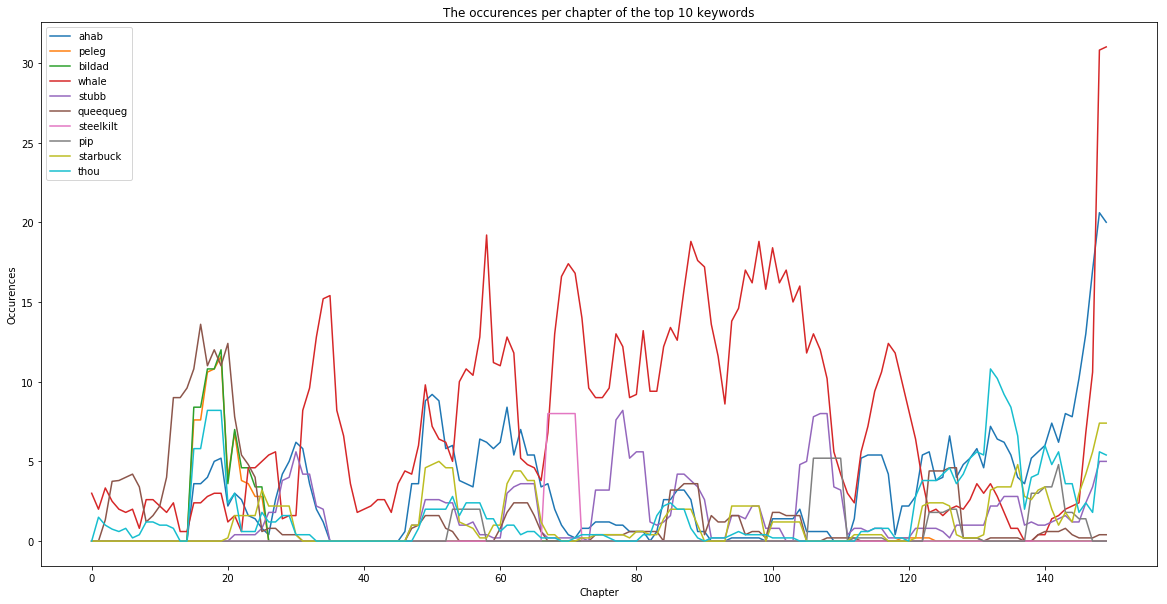

In [8]:
/Plots the occurence of the top terms per chapter
plt:.p.import[`matplotlib.pyplot]
plt[`:figure][`figsize pykw 20 10];
{a:exec chapter from tab where term=x;b:exec occurences from tab where term=x;plt[`:plot][a;b];}each key 10#keywords; 

plt[`:title]["The occurences per chapter of the top 10 keywords"];
plt[`:ylabel]`Occurences;
plt[`:xlabel]`Chapter;
plt[`:legend][key 10#keywords;`loc pykw "upper left"];
plt[`:show][];

### Calculating feature vectors for words

The feature vector for a word can be calculated as a collection of how well other words predict the given keyword. The weight given to these words is a function of how much higher the actual co-occurrence rate is from the expected co-occurrence rate the terms would have if they were randomly distributed.

.nlp.findRelatedTerms finds terms that have occured in the same sentence as the queried word. It returns a dictionary of each related term and their z-score in a descending order. A large z-score indicates that the term occured more frequently than if the term was randomly distributed in the corpus. 


In [9]:
/finding words that relate to captain
5#.nlp.findRelatedTerms[corpus;`captain]

peleg | 1.653247
bildad| 1.326868
ahab  | 1.232073
ship  | 1.158671
cabin | 0.9743517


## Finding related phrases

Phrases can be found by looking for runs of words with an above average significance to the query term. 

In [10]:
/ "captain ahab" is the phrase releated to captain that occurs the most in this corpus
.nlp.extractPhrases[corpus;`captain]

`captain`ahab      | 48
`captain`peleg     | 20
`captain`bildad    | 10
`captain`sleet     | 6
`stranger`captain  | 6
`sea`captain       | 3
`captain`pollard   | 3
`whaling`captain   | 2
`captain`peleg`said| 2
`captain`ahab`stood| 2
`captain`ahab`said | 2
`captain`stood     | 2
`captain`d'wolf    | 2
`captain`mayhew    | 2
`way`captain       | 2
`captain`boomer    | 2


 # NLP applied to the Enron dataset 
 
The Enron email dataset is one of the few if not the only large publicly available dataset of corporate emails. Made available after the Enron trial, it includes the emails of many employees, including c-suite individuals such as former Enron CEOs Jeffrey Skilling and Ken Lay, whose emails will be investigated this in this paper.

These datasets can be found at https://www.cs.cmu.edu/~enron/ 


In [11]:
parseEnronEmail: {[email]
    newlines: where email = "\n";
    
    findTag: {[email; newlines; tag]
        tag: "\n" , tag , ":";
        tagStart: count[tag] + first email ss tag;
        : $[null tagStart;
            "";
            [   tagEnd  : first newlines where tagStart < newlines;
                trim tagStart _ tagEnd # email]];
        }[email; newlines];
    
    : (!) . flip (
         / Some dates are invalid, or 1979.12.31, both of which should be 0nd
        (`date; {$[x~(); 0nd; x < 1980.01.01; 0nd; x]}first first .nlp.findDates findTag "Date");
        (`time;first first .nlp.findTimes findTag "Date");
        (`subject; findTag "Subject");
        (`from; findTag "From");
        (`to; findTag "To");
        (`cc; findTag "Cc");
        (`bcc; findTag "Bcc");
        (`text; (2 + first email ss "\n\n") _ email));
    };

In [12]:
loadEnronEmails:{[path]

    // Import all the files in the directory
    emails:parseEnronEmail each distinct .nlp.loadTextFromDir[path][`text];
    
    // These affect things like comparing documents/finding keywords
    badTokens:.nlp.regex.compile["\n((To|Subject|From|Sent):|=09|=\\?|ANSI| ---)[^\n]*|\\[IMAGE\\]"; 1b];
    regex.replaceAll:{x[`:sub;<][y;z]};
    emails[`text]:regex.replaceAll[badTokens; "";] each emails `text;
    emails[`text]:(emails[`subject] ,\: "\n\n") ,' emails `text;
    
    : emails;
    };

In [13]:
myparser:.nlp.newParser[`en;`tokens`isStop`text`sentChars`sentIndices`keywords]

/ Load and parse data
jeffemails:distinct loadEnronEmails "../data/enron/skilling-j"
jeffcorpus:myparser jeffemails[`text]

/joining the original datasets and the corpus
jefftable:jeffcorpus,'jeffemails

In [14]:
layemails:distinct loadEnronEmails"../data/enron/lay-k"
-1 "Loaded ",(string count layemails)," emails";
\t laycorpus:myparser layemails[`text]

/joining the original datasets and the corpus
laytable:laycorpus,'layemails

Loaded 3651 emails


7959


### Comparing Corpora

Enron CEO Jeff Skilling was a member of the Beta Theta Pi fraternity at Southern Methodist University (SMU). If we want to find secret fraternity code words used by the Betas, we can compare his fraternity emails (those containing “SMU” or “Betas”) to his other emails. 

Sorting terms by their affinity towards the fraternity corpus, the first unusual word, the 10th most polarized word, is “kai”, a greeting and sign-off used in fraternity emails. Also appearing near the top of this list are references to the fraternity’s “Eye of Wooglin” ritual.

* compareCorpora is based on the paper "comparing corpora using frequency profiling". Compares the number of occurences of each term between the two corpora. Gives two dictionaries of each terms affinity to each corpus.

In [15]:
\c 30 200
fraternity:jeffcorpus i:where (jeffcorpus[`text] like "*Betas*")|jeffcorpus[`text] like "*SMU*"
remaining:jeffcorpus til[count jeffcorpus]except i
summaries:key each 25#/:.nlp.compareCorpora[fraternity;remaining]
/ summary of the fraternity corpus
summaries 0
/summary of the remaining corpus
summaries 1

`beta`homecoming`betas`smu`yahoo`groups`tent`reunion`forget`-kai-`crowd`years`incredible`connected`biggest`ago`http://docs.yahoo.com/info/terms/`pick`stay`subject`left`far`consider`at`use


`enron`jeff`business`=`information`please`$`market`services`energy`management`713`the`company`we`1`this`questions`power`technology`companies`global`following`meeting`center


### Calculating feature vectors for documents

The values associated with each term in a feature vector are how significant that term is as a descriptor of the entity. For documents, this can be calculated by comparing the frequency of words in that document to the frequency of words in the rest of the corpus. The intuition which is formalized mathematically is that any term which has a uniform distribution in the corpus will be insignificant, whereas those which appear in clusters will be more significant. The frequency of the term is also a contributing factor to the significance. Thus, any term which is both frequent and clustered will be more significant than those which are infrequent or uniformly distributed. Describing documents this way is a very fast operation and, when run on e-mail length documents, has a throughput of tens of thousands of documents per second.


Sorting the terms in a feature vector by their significance, you get the keywords that distinguish a document most from the corpus, forming a terse summary of the document. This shows a the most significant terms in the feature vector for one of Enron CEO Jeff Skilling’s email’s describing an advertiment for ready2go.

In [16]:
ready2go:first where jeffcorpus[`text] like "Ready2Go*"

In [17]:
/ here is the random email from the dataset
-1 jeffcorpus[ready2go]`text;

Ready2Go

Are you Ready2Go ?

Have you ever experienced problems accessing the network remotely when traveling on business or when trying to work from home on your Enron laptop?  Would you like someone to test and customize the dial-up access on your laptop before you head out of town on your next trip? 

We have identified a need and are now supplying a new service for Corp and EBS employees and it's called Ready2Go !

This new service has been established to test, modify, and update the dial-up software on your laptop.

How it works:

A calendar has been created on ITCentral at <http://itcentral.enron.com/Data/Services/Ready2Go>

Go to the site and schedule a time that is convenient for you. Then, bring your laptop to our testing site, (either at 3AC105 or EB2268D).  We will examine your system, update your software (if needed) and even customize it for the next location you will be traveling to.  We'll also provide a training session in accessing the network remotely with your lapto

In [18]:
/ here we can see that ready2go is the most frequent word
5#desc .nlp.TFIDF[jeffcorpus]1637

ready2go | 15.45504
laptop   | 13.11152
remotely | 10.278
customize| 9.410488
itcentral| 7.864036


## Searching 

Searching can be done using words, documents, or collections of documents as the query or dataset. To search for documents similar to a given document, you can represent all documents as feature vectors using TF-IDF, then compare the cosine similarity of the query document to those in the dataset and find the most similar documents, with the cosine similarity giving a relevance score. Feature vectors are extremely composable. To search by a collection of documents, just sum the feature vectors for all the elements in the query to get a single vector you can use for searching.


In [19]:
where jeffcorpus[`text] like "Fire Chief Committee*"
queryemail:first jeffcorpus where jeffcorpus[`text] like "Fire Chief Committee*"
-1 queryemail`text;

,309


Fire Chief Committee

Dear Jeff:

    Thank you again for extending me an invitation to be on your committee to
select the new Houston Fire Chief.  I look forward with much enthusiasm and
excitement to working with you and the committee members on this very
important project.

    I enjoyed our visit at the Doubletree immensely. It was great walking
down memory lane and recalling our days in Cambridge. We probably passed each
other at Harvard Square at some point during our time there.  As I said, I am
a great admirer of you and ENRON. The innovation, creativity and unique
(though soon to be widely copied) business plan make ENRON one of Houston's
(and the nation's, maybe also California's in the near future) great assets.

     Since the subject came up in our conversation, I will add a short
personal note. After reviewing several potential transactions this week, it
is quite possible that my partners and I will be entering into a "business
defining" transaction in the next two months

In [20]:
first 1_idesc .nlp.compareDocs[queryemail`keywords]each jeffcorpus`keywords
mostsimilar:jeffcorpus first 1_idesc .nlp.compareDocs[queryemail`keywords]each jeffcorpus`keywords

306


In [21]:
-1 mostsimilar`text;

Select Comm AGENDA - Jan 25-Febr 1

Houston Fire Chief Selection Committee Members: Jeff Skilling - Chairperson, 
Troy Blakeney, Gerald Smith, Roel Campos and James Duke.

Congratulations selection committee members! We have a very important and 
exciting task ahead of us. 

On the agenda for the next week are two important items - (1) the Mayor's 
February 1 news conference announcing the Houston Fire Chief selection 
committee and its members; and (2) coordination of an action plan, which we 
should work out prior to the news conference.

News Conference specifics:
speakers - Mayor Brown and Jeff Skilling
in attendance - all selection committee members
location - Fire Station #6, 3402 Washington Ave.
date - Thursday, February 1, 2001
time - 2pm
duration - approximately 30 minutes

I'd like to emphasize that it would be ideal if all selection committee 
members were present at the news conference. 

I will need bios on each committee member emailed to me by close of business 
Monday, 

When documents are marked as similar, either by a clustering algorithm, or when searching for documents similar to some other document, it may not always be obvious why a result matched, or why it has the relevance score it was given. For any pair of documents or centroids, the list of features can score can be sorted by how much they contribute to the similarity. This example compares two of former Enron CEO Jeff Skilling’s emails, both of which have in common the subject of selecting Houston’s next fire chief.


### Comparing feature vectors 

The cosine similarity of two vectors is the dot product of two vectors over the product of their magnitudes. It is a standard distance metric for comparing document. The explainSimilarity function calculates how much each shared term contributre to the cosine similarity and sorts it in descending order. 

In [22]:
/ returns what terms contribute to the similarity
10#.nlp.explainSimilarity . jeffcorpus[`keywords]306 309

fire     | 0.2356875
roel     | 0.1325517
committee| 0.1183095
mayor    | 0.1179032
since    | 0.08990038
station  | 0.0850332
chief    | 0.06281811
select   | 0.0393875
important| 0.03497948
members  | 0.03220782


### Finding outliers

The centroid of a collection of documents is the average of their feature vectors. As such, documents close to the centroid are representative, while those far away are the outliers. Given a collection of documents, finding outliers can be a quick way to find interesting documents, those that have been mis-clustered, or those not relevant to the collection.
	
The emails of former Enron CEO Ken Lay contain 1124 emails with a petition. Nearly all of these use the default text, only changing the name, address and email address. To find those petitions which have been modified, sorting by distance from the centroid gives emails where the default text has been completely replaced, added to, or has had portions removed, with the emails most heavily modified appearing first.


In [23]:
\c 30 100
petition:laycorpus where laytable[`subject] like "Demand Ken*"
centroid:sum petition`keywords
.nlp.i.compareDocToCentroid[centroid]each petition`keywords
iasc .nlp.i.compareDocToCentroid[centroid]each petition`keywords
outliers:petition iasc .nlp.i.compareDocToCentroid[centroid]each petition`keywords

0.2857592 0.2298067 0.3004258 0.246543 0.321758 0.2150244 0.3225884 0.2786702 0.261679 0.2913605 ..


54 15 11 235 277 272 163 752 861 232 970 88 815 587 992 507 964 1062 946 418 255 406 1047 1076 92..


Sorting the petitions by distance from centroid reveals many angry and threatening emails from Enron stockholders following the scandal, which are outliers due to their colourful language otherwise absent from the corpus, with sentences such as “The world, and possibly the afterworld, demand your repentence” and "I hope your ill-gotten gains do not serve you in any good way".

In [24]:
/showing an email that is classed as an outlier
-1 (outliers 0)`text;

Demand Ken Lay Donate Proceeds from Enron Stock Sales

Gordon Wiltsie
Bozeman, MT
gw@alpenimage.com

To Mr. Ken Lay,

In the interest of saving your own soul (not to mention the ability to sleep at night) I urge you to donate the millions of dollars you made from selling Enron stock to such funds as the Enron Employee Transition Fund.  I recommend that you encourage your fellow executives to do the same.  Whether you are religious or not, karma is a very real force in this universe.   God or no god, your actions will have consequences for both you and the nation for decades into the future. The world, and possibly the afterworld, demand your repentence.  Do you really want to go to Hell?

If there is a shred of honor in your life, you will make amends for selling $101 million worth of Enron stock while aggressively urging the company's employees to keep buying it.  Please donate this money to the funds set up to help repair the lives of those Americans hurt by Enron's underhanded deali

## Clustering

When exploring a set of documents, a very useful operation is clustering. This will show the major themes in a dataset, allowing you to focus in on relevant areas, and filter out sections of the dataset that are not related to the analysis.

Clusters can be summarized by their centroids, which are the sum of the feature vectors of all the documents they contain. Centroids are useful for giving a quick summary of a cluster’s contents. 


### Finding the cluster cohersion
As clustering a dataset may result in hundreds of clusters, it is helpful to be able to sort the results by quality. The cohesiveness of a cluster is a measure of how similar the documents are within that cluster.  It is calculated as the mean sum of squares error, which aggregates each document’s distance from the centroid. Sorting by cohesiveness will give very focused clusters first. Sorting by cluster size is also useful, as this will show the larger themes within the dataset.

The format function takes a corpus, and a list of clusters (as document indices), and gives the size, cohesion and keywords for each cluster.

In [25]:
format: {[corpus; clusters]
    // Get the most relevant descriptors of each cluster
    summaries: {[docs]
        : (!) . flip (
            (`size; count docs);
            (`cohesion; .nlp.cluster.MSE docs);
            (`keywords; enlist key .nlp.i.takeTop[10] avg docs));
        } each corpus[`keywords] clusters;

    // Remove any outliers
    summaries: select from summaries where size > 1;
    
    // Sort by cohesion
    : summaries idesc summaries[`cohesion];
    };

### Summarize Clustering

This is a fast clustering algorithm that produces cohesive and reasonably sized clusters. It finds the n documents that best summaries the n most important keywords in the corpus, then clusters the remaining documents around these centroids. For Jeff Skilling's emails, this produces clusters for various re-occuring reports, such as the EnronOnline and ENE reports, as well as clusters for fraternity emails.

In [26]:
clusters:.nlp.cluster.summarize[jeffcorpus;20];

format[jeffcorpus; clusters]

size cohesion   keywords                                                                         ..
-------------------------------------------------------------------------------------------------..
39   0.7295696  notional enrononline counterparties daily transactions summary average transactin..
42   0.6849735  notification violation memo erv viewing published named website revision publishe..
33   0.5987458  intranet enrononline reports secured login appear http://eolinfo.enron.com dropdo..
23   0.5205989  murdock erica jerry harris unauthorized dinners printout forbidden error destroy ..
20   0.4443998  succession direction ready role that=20 cylinders effecti= all=20 i=01,m everyone..
31   0.4272669  goal raise slipped incredibly pledge ms150 well wo consideration lon             ..
6    0.4155249  gap violation maturity notification memo http://erv.corp.enron.com/linkfromexcel...
31   0.3798483  ewooglin intelligence seti http://docs.yahoo.com/info/terms/ shack betas reunion ..


### MCL Clustering 

For clustering under 1000 documents, MCL clustering an algorithm that lets you choose the trade-off between cluster size and cohesion very precisely. It takes as a parameter the minimum similarity at which it will consider documents related. Setting this parameter very high will cluster different drafts or versions of the same document together, while setting it low finds large clusters of thematically related documents.

This algorithm can be demonstrated well on the IEEE VAST 2014 Challenge data, which includes a collection of fictional news articles describing protests around corporate pollution of groundwater and a related kidnapping. You can download it from http://vacommunity.org/VAST+Challenge+2014%3A+Mini-Challenge+1#Available_Data

In [27]:
article:.nlp.loadTextFromDir ["../data/articles"]
articlecorpus:myparser article[`text]

In [28]:
compare: {[similarity]
    clusters:.nlp.cluster.MCL[articlecorpus;similarity;0b];
     `size`cohesion!(avg count each clusters;avg .nlp.cluster.MSE each articlecorpus[`keywords] clusters)};

compare each .07 .1 .2 .3 .4 .5 .6

size     cohesion 
------------------
21.025   0.3540559
12.61194 0.4067295
7.473214 0.4916616
5.748252 0.512234 
4.865385 0.5401827
3.94964  0.6256382
2.825397 0.7188214


## Radix Clustering

For clustering very large datasets, .nlp.radix and .nlp.fastRadix can be used. These are very performant, .nlp.fastRadix can cluster millions of documents per minute, and .nlp.radix can cluster tens of thousands of documents per minute.

In [29]:
count jeffcorpus
\ts .nlp.cluster.radix[jeffcorpus; 50]

2603


54 1002992


## Working with dates and times
The IEEE VAST 2014 Challenge data, from the section on MCL clustering, has several articles describes a kidnapping. One of the problems in the challenge is to build a timeline of the day of the kidnapping, given a collection of news articles. This finds the dates of all documents, and any sentences containing times, and uses that to build a timeline. 

In [30]:
// Use the first date in a document as the date of that document
articlecorpus[`date]:{$[x~(); 0nd; x]}each (.nlp.findDates peach articlecorpus[`text])[;0;0];

// Filter out documents outside the range we are interested in
articlecorpus@:where articlecorpus[`date] = 2014.01.20;

// This function will, for each document, pair any sentences containing times
// with their parsed timestamp
buildTimeline: {[doc]
    // Find all the times   
    times:.nlp.findTimes doc[`text];
    
    // Extract the sentences containing those times
    sentences:{last "\n\n" vs x} each .nlp.getSentences[doc] doc[`sentChars][;0] bin times[;2];
    
    // Pair up sentences with the parsed timestamp
    (doc[`date]+times[;0]),'enlist each sentences}

// Find the per-document timelines and raze them into a single timeline
timeline:raze buildTimeline each articlecorpus;

// Sort the timeline
timeline:timeline iasc timeline[;0];

// Show the sentences, sorted by date and time
([]time: `minute$timeline[;0];text:timeline[;1])

time  text                                                                                       ..
-------------------------------------------------------------------------------------------------..
02:00 "1853 MODERNIZATION - speculation that the arrival of PM of 2:00 of the civil employee of g..
10:00 "The cars of the body of firemen of Avila were sent to the headquarters of GAStech - of Kro..
10:00 "Little time after the morning the meeting was closed with 10:00, trucks of department of f..
10:00 "Abila Fire Department trucks were dispatched to GAStech - Kronos headquarters around 10:00..
10:00 "Shortly after the morning meeting ended at 10:00, Abila Fire Department trucks responded t..
10:00 "Shortly after tomorrow the meeting finished in the 10:00, Abila that the cars of the body ..
10:00 "Abila Fire Department trucks were dispatched to GAStech - Kronos headquarters around 10:00..
10:00 "Abila Fire Department trucks were dispatched to GAStech - Kronos headquarters around 10:00..


## Analysing emails from a range of specific dates  

In [31]:
\c 30 100
/function to extract significant words from a range of dates
summarizeWindow:{[d;w]
    target:select from d where date within w;
    history:select from d where not date within w;
    key first .nlp.compareCorpora[target;history]}

In [32]:
summarizeWindow[jefftable;2000.04.26 2000.05.06]

`chuck`150/`closer`ms`chuck.paul@a-closer-look.com`paul`homecoming`http://www.a-closer-look.com`0..


In [33]:
summarizeWindow[jefftable;2001.03.10 2001.03.13]

`california=01,s`fms`prevented`state=01,s`solutions`elected`mcbride`utp`deer`eddie`valley`market=..


In [34]:
summarizeWindow[jefftable;2001.02.24 2001.02.26]

`lisa`02/26/2001`interview`candidates`questions`troy`pre`lisa.connolly@enron.com`suggestions`roel..


### Sentiment analysis


Using a prebuilt model of the degrees of positive and negative sentiment for English words and emoticons, as well as parsing to account for negation, adverbs and other modifiers, sentences can be scored for their negative, positive and neutral sentiment. 

* compound value: the overall positive/negative sentiment 
* pos value: the positive sentiment
* neg value: the negative sentiment
* neu value: the neural sentiment. A function of the amount of input having no sentiment value. 

We will extract the sentences from each email and find the most positive and negative sentences.


In [35]:
\c 100 200
sentences:10000#{x where(count each x)<200}raze .nlp.getSentences each jeffcorpus
scores:.nlp.sentiment each sentences
10#sentences idesc scores `compound
10#sentences iasc scores `compound

"Request from Better Business Bureau\n\nDear Jeff:\n\nI would like to invite you to honor us as the keynote speaker for the Tenth \nAnnual Better Business Bureau Awards for Excellence."
"\n\nShep Moyle, chairman of the seminar, is winner of the 1999 Best of the Best \nYPO International Education Award winner."
"Forbes-Milken Institute Best Places Ranking\n\nDear Friend: \n\nThe 3rd annual Forbes-Milken Institute Best Places Ranking was released \ntoday, showing what cities are the best for business and c..
"\n\nWe also intend to publish a special  supplement that will provide Awards \nwinners with an excellent opportunity to  celebrate their achievements \nthrough advertising."
"\n\nFirst, I would like to thank you for making this company the great place it \nis today, and for giving me the opportunity to have a great career here."
"\n\nFirst, I would like to thank you for making this company the great place it \nis today, and for giving me the opportunity to have a great career here."

" She \nadded the sales wrong on the cash register, she charged the wrong prices for \nitems, she gave the wrong bag of food to the wrong customer, and she dropped \nand broke a half-gallon of milk."
"Heard no gun fire or bomb blasts from the nearby hills, where \nrecently some Albanian rebels complaining of an absence of political adn \neconomic rights had been trying to mess things up a bit.?"
"\n>          The wire services are reporting the official death toll at\n>      10,204--but add that 35,000 are missing beneath the rubble, many\n>      presumed dead."
" I suspect the tower isn't nearly half as\nbothered by these kid's budding pyromania as me, since it has no doubt\nbeen subject to much more serious attacks during its 700 or so year\nhistory."
"\nStating that I will be paid for vacation less any I take between now and the \nseverance date is deceptive at the least and would not constitute RESPECT, \nEXCELLENCE nor INTEGRITY!"
"In addition to finding Dallas County liable for i

### Reading in Mbox files to q.

The MBOX file is the most common format for storing email messages on a hard drive. The NLP library has the capability to read in Mbox files and constructs a table of parsed emails.

The columns that consist in the table are


column   | content
---------|------------------------------------------------------------------
`sender | list of chars containing the name and email address of the sender
`to |  list of chars containing the name and email address of the reciever/recievers
`date| timestamp of the date
`subject| list of chars containing the subject of the email
`text| list of chars containing the text of the email
`contentType|list of chars containing the content type of the email
`payload| payload



In [36]:
Mboxemails:.nlp.loadEmails "../data/tdwg-lit.mbox"
Mboxemails

sender                                                            to                                                                                                                                 ..
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------..
"Anna Weitzman" "Weitzman@si.edu"                                 ,("";"TDWG-Lit@lists.tdwg.org")                                                                                                    ..
"Anna Weitzman" "Weitzman@si.edu"                                 ,("";"TDWG-Lit@lists.tdwg.org")                                                                                                    ..
"Anna Weitzman" "Weitzman@si.edu"                                 ,("";"TDWG-Lit@lists.tdwg.org")                                                                                                    ..


The following function returns a table of who emailed who and the number of times they emails each other.

In [37]:
.nlp.email.getGraph[Mboxemails]

sender                    to                                   volume
---------------------------------------------------------------------
Weitzman@si.edu           TDWG-Lit@lists.tdwg.org              12    
agosti@amnh.org           tdwg-lit@lists.tdwg.org              6     
G.Hagedorn@BBA.DE         TDWG-Lit@lists.tdwg.org              5     
Chris.Freeland@mobot.org  tdwg-lit@lists.tdwg.org              3     
WEITZMAN@si.edu           Alex.Chapman@dec.wa.gov.au           3     
WEITZMAN@si.edu           TDWG-Lit@lists.tdwg.org              3     
WEITZMAN@si.edu           csparr@umd.edu                       3     
WEITZMAN@si.edu           leebel@netspace.net.au               3     
WEITZMAN@si.edu           tdwg-lit@lists.tdwg.org              3     
dhobern@gbif.org          TDWG-Lit@lists.tdwg.org              3     
dhobern@gbif.org          Weitzman@si.edu                      3     
nozomi@biol.tsukuba.ac.jp TDWG-Lit@lists.tdwg.org              3     
ricardo@tdwg.org    

This can then be used to plot an email graph. This was rendered in Analyst for Kx. Node size represents email volume

<img src="../images/network.png" />